In [2]:
#import libraries
import pandas as pd
import numpy as np
import xgboost as xgb

In [169]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn import metrics 

In [123]:
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [8]:
train = pd.read_csv('train_modified.csv')
target = 'Disbursed'
IDcol = 'ID'

In [10]:
train.head()

,Disbursed,Existing_EMI,ID,Loan_Amount_Applied,Loan_Tenure_Applied,Monthly_Income,Var4,Var5,Age,EMI_Loan_Submitted_Missing,...,Var2_2,Var2_3,Var2_4,Var2_5,Var2_6,Mobile_Verified_0,Mobile_Verified_1,Source_0,Source_1,Source_2
0,0.0,0.0,ID000002C20,300000.0,5.0,20000,1,0,37,1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,ID000004E40,200000.0,2.0,35000,3,13,30,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,ID000007H20,600000.0,4.0,22500,1,0,34,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,ID000008I30,1000000.0,5.0,35000,3,10,28,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,25000.0,ID000009J40,500000.0,2.0,100000,3,17,31,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [11]:
train.describe()

,Disbursed,Existing_EMI,Loan_Amount_Applied,Loan_Tenure_Applied,Monthly_Income,Var4,Var5,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,...,Var2_2,Var2_3,Var2_4,Var2_5,Var2_6,Mobile_Verified_0,Mobile_Verified_1,Source_0,Source_1,Source_2
count,87020.000000,8.702000e+04,8.702000e+04,87020.000000,8.702000e+04,87020.000000,87020.000000,87020.000000,87020.000000,87020.000000,...,87020.000000,87020.000000,87020.000000,87020.000000,87020.000000,87020.000000,87020.000000,87020.000000,87020.000000,87020.000000
mean,0.014629,3.693212e+03,2.301444e+05,2.131292,5.884997e+04,2.949805,4.961503,30.904171,0.681384,0.681384,...,0.163296,0.007286,0.015111,0.006251,0.379591,0.350942,0.649058,0.443197,0.343427,0.213376
std,0.120062,3.979411e+04,3.540818e+05,2.013375,2.177511e+06,1.697720,5.670385,7.147194,0.465943,0.465943,...,0.369637,0.085045,0.121997,0.078819,0.485288,0.477268,0.477268,0.496766,0.474855,0.409693
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,18.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,1.650000e+04,1.000000,0.000000,26.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000e+00,1.000000e+05,2.000000,2.500000e+04,3.000000,2.000000,29.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.500000e+03,3.000000e+05,4.000000,4.000000e+04,5.000000,11.000000,34.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000e+07,1.000000e+07,10.000000,4.445544e+08,7.000000,18.000000,100.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
train.values[0]

array([0.0, 0.0, 'ID000002C20', 300000.0, 5.0, 20000, 1, 0, 37, 1, 1, 1,
       1, 1, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0],
      dtype=object)

In [197]:
def model_fit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param=alg.get_xgb_params()
        xgtrain=xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult=xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds, metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data:
    alg.fit(dtrain[predictors], dtrain['Disbursed'], eval_metric='auc')
    
    #Predict training set:
    dtrain_predictors=alg.predict(dtrain[predictors])
    dtrain_predprob=alg.predict_proba(dtrain[predictors])[:,1]
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
    
    feat_imp=pd.Series(alg.Booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature importances')
    plt.ylabel('Feature Importance Score')

In [168]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

# 1-Fix a learning rate and number of estimator for tuning tree-based parmeters

In [62]:
#Choose all predictors except columns target & IDcols
predictors=[x for x in train.columns if x not in [target, IDcol]]
xgb1=XGBClassifier(learning_rate=0.1,
n_estimators=1000,
max_depth=5, 
colsample_bytree=0.8, 
subsample=0.8,
gamma=0,
    n_jobs=4,
random_state=27)

In [96]:
modelfit(xgb1, train, predictors)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.9854
AUC Score (Train): 0.895857


TypeError: 'str' object is not callable

In [200]:
xgb1.get_params()['base_score']

0.5

Text(0,0.5,'Feature Importance Score')

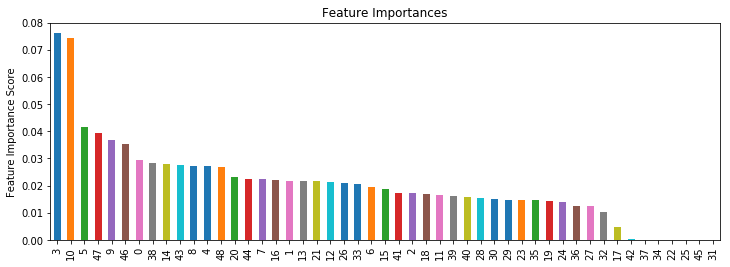

In [139]:
feat_imp = pd.Series(xgb1.feature_importances_).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [140]:
from xgboost import plot_importance

In [166]:
imp_vals = xgb1.get_booster().get_fscore()
xgb1.get_num_boosting_rounds

<bound method XGBModel.get_num_boosting_rounds of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=127, n_jobs=4,
       nthread=None, objective='binary:logistic', random_state=27,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.8, verbosity=1)>

Text(0,0.5,'Feature Importance Score')

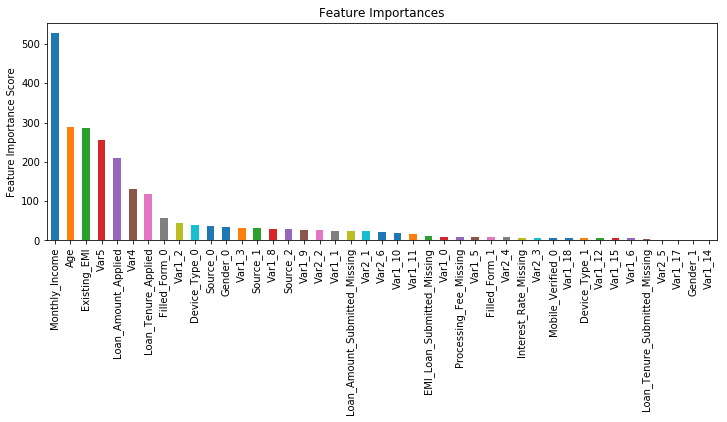

In [146]:
feature_important = xgb1.get_booster().get_fscore()
pd_series=pd.Series(feature_important)
feat_imp=pd_series.sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

# Step 2: Tune max_depth and min_child_weight

In [172]:
#Get parameters of the xgb1 to pass in GridSearchCV
xgb1.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=127, n_jobs=4,
       nthread=None, objective='binary:logistic', random_state=27,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.8, verbosity=1)>

In [176]:
param_test={'max_depth':range(3,10,2), 'min_child_weight':range(1,6,2)}
gsearch1=GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       learning_rate=0.1, max_delta_step=0,
       missing=None, n_estimators=127, n_jobs=4,
       nthread=None, objective='binary:logistic', random_state=27,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.8, verbosity=1),param_grid=param_test,scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=127, n_jobs=4,
       nthread=None, objective='binary:logistic', random_state=27,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.8, verbosity=1),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [175]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83584, std: 0.01190, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.83664, std: 0.01117, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.83645, std: 0.01022, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.84102, std: 0.00802, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.84065, std: 0.00954, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.83997, std: 0.00704, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.83589, std: 0.00581, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.83920, std: 0.00804, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.83620, std: 0.00848, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.82961, std: 0.00463, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.83069, std: 0.00887, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.83237, std: 0.00570, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 5, 'min_child_weight': 1

In [177]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83584, std: 0.01190, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.83664, std: 0.01117, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.83645, std: 0.01022, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.84102, std: 0.00802, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.84065, std: 0.00954, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.83997, std: 0.00704, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.83589, std: 0.00581, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.83920, std: 0.00804, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.83620, std: 0.00848, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.82961, std: 0.00463, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.83069, std: 0.00887, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.83237, std: 0.00570, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 5, 'min_child_weight': 1

In [178]:
gsearch1.estimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=127, n_jobs=4,
       nthread=None, objective='binary:logistic', random_state=27,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.8, verbosity=1)

In [179]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=127, max_depth=5,
 min_child_weight=1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84102, std: 0.00802, params: {'gamma': 0.0},
  mean: 0.84222, std: 0.00671, params: {'gamma': 0.1},
  mean: 0.84151, std: 0.00741, params: {'gamma': 0.2},
  mean: 0.84077, std: 0.00906, params: {'gamma': 0.3},
  mean: 0.84077, std: 0.00832, params: {'gamma': 0.4}],
 {'gamma': 0.1},
 0.8422152211629322)

In [190]:
param_test4 = {
 'gamma':[0.025,0.05,0.1]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=127, max_depth=5,
 min_child_weight=1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84092, std: 0.00771, params: {'gamma': 0.025},
  mean: 0.84121, std: 0.00723, params: {'gamma': 0.05},
  mean: 0.84222, std: 0.00671, params: {'gamma': 0.1}],
 {'gamma': 0.1},
 0.8422152211629322)

In [191]:
param_test5 = {
 'gamma':[0.1,0.125,0.15]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=127, max_depth=5,
 min_child_weight=1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84222, std: 0.00671, params: {'gamma': 0.1},
  mean: 0.84201, std: 0.00734, params: {'gamma': 0.125},
  mean: 0.84178, std: 0.00671, params: {'gamma': 0.15}],
 {'gamma': 0.1},
 0.8422152211629322)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.9854
AUC Score (Train): 0.896139


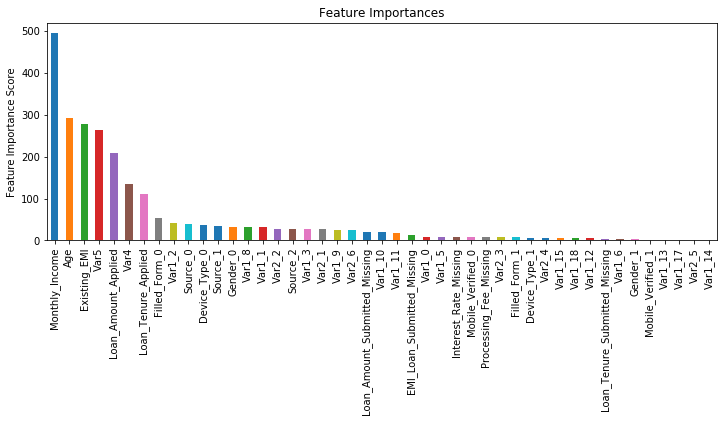

In [199]:
predictors=[x for x in train.columns if x not in [target, IDcol]]
xgb5=gsearch5.best_estimator_
modelfit(xgb2, train, predictors)

# 3 Tuning subsample and colsample_bytree

In [204]:
# a typical subasample:  btweene 0.6 and 0.9
# a typical value of colsample_bytree: 0.6 and 0.9
param_test6={'subsample': [i/10.0 for i in range(6,10)] ,'colsample_bytree':[i/10.0 for i in range(6,10)]}

gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=127, max_depth=5,
min_child_weight=1, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27,gamma=0.1), 
param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch6.fit(train[predictors], train[target])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83985, std: 0.00709, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.84028, std: 0.00526, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.84047, std: 0.00686, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.83831, std: 0.00854, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.83688, std: 0.00747, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.83840, std: 0.00786, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.84036, std: 0.00887, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.84023, std: 0.00852, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.83956, std: 0.00897, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.83912, std: 0.00658, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.84222, std: 0.00671, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.84163, std: 0.00843, params: {'colsample_bytree': 0.8, 'subsample'

In [205]:
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83985, std: 0.00709, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.84028, std: 0.00526, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.84047, std: 0.00686, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.83831, std: 0.00854, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.83688, std: 0.00747, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.83840, std: 0.00786, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.84036, std: 0.00887, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.84023, std: 0.00852, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.83956, std: 0.00897, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.83912, std: 0.00658, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.84222, std: 0.00671, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.84163, std: 0.00843, params: {'colsample_bytree': 0.8, 'subsample'

In [206]:
param_test7={'subsample': [0.75,0.8,0.85] ,'colsample_bytree':[0.75,0.8,0.85]}

gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=127, max_depth=5,
min_child_weight=1, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27,gamma=0.1), 
param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch7.fit(train[predictors], train[target])
gsearch7.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84120, std: 0.00695, params: {'colsample_bytree': 0.75, 'subsample': 0.75},
  mean: 0.83918, std: 0.00869, params: {'colsample_bytree': 0.75, 'subsample': 0.8},
  mean: 0.83942, std: 0.00852, params: {'colsample_bytree': 0.75, 'subsample': 0.85},
  mean: 0.84116, std: 0.00705, params: {'colsample_bytree': 0.8, 'subsample': 0.75},
  mean: 0.84222, std: 0.00671, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.83976, std: 0.00835, params: {'colsample_bytree': 0.8, 'subsample': 0.85},
  mean: 0.84118, std: 0.00657, params: {'colsample_bytree': 0.85, 'subsample': 0.75},
  mean: 0.84103, std: 0.00798, params: {'colsample_bytree': 0.85, 'subsample': 0.8},
  mean: 0.83943, std: 0.00807, params: {'colsample_bytree': 0.85, 'subsample': 0.85}],
 {'colsample_bytree': 0.8, 'subsample': 0.8},
 0.8422152211629322)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.9854
AUC Score (Train): 0.896139


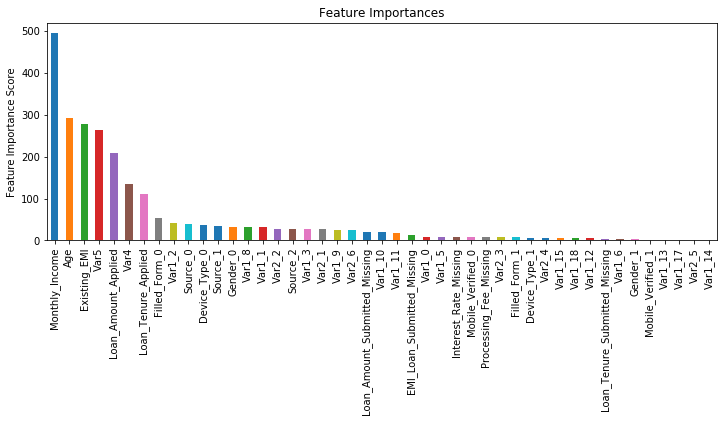

In [208]:
predictors=[x for x in train.columns if x not in [target, IDcol]]
xgb6=gsearch7.best_estimator_
modelfit(xgb6, train, predictors)